<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/InClass/DT_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-by-Step Preparation: Decision Trees & KNN (With Explanations)

This notebook is designed for **learning and understanding**, not for solving the exercise.

✔ No pipelines
✔ Step-by-step
✔ Explanation **before each step**
✔ Includes **ID3-style Decision Tree (Entropy)**

**Goal:** After reading this notebook, you should be able to solve the class exercise on your own.

## 1. Import Required Libraries

**Why?**
- `pandas`, `numpy`: data handling
- `matplotlib`: plotting
- `sklearn`: machine learning algorithms and evaluation

We import only what we really use to keep things clear.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2. Create a Simple Categorical Dataset

**Why?**
- Decision Trees and KNN can work with categorical data
- Real datasets often contain categories, not numbers

**Target variable:** `Buys` (Yes / No)


In [2]:
data = {
    'AgeGroup': ['Young','Young','Middle','Old','Old','Middle','Young','Old'],
    'Income': ['Low','Medium','Medium','High','Low','High','Low','Medium'],
    'Student': ['Yes','No','Yes','Yes','No','No','Yes','No'],
    'Buys': ['No','No','Yes','Yes','No','Yes','Yes','No']
}

df = pd.DataFrame(data)
df

,AgeGroup,Income,Student,Buys
0,Young,Low,Yes,No
1,Young,Medium,No,No
2,Middle,Medium,Yes,Yes
3,Old,High,Yes,Yes
4,Old,Low,No,No
5,Middle,High,No,Yes
6,Young,Low,Yes,Yes
7,Old,Medium,No,No


## 3. Separate Features and Target

**Why?**
- `X` contains input features
- `y` contains the label we want to predict

Machine learning models always learn **X → y**.

In [3]:
X = df.drop('Buys', axis=1)
y = df['Buys']

## 4. Convert Categorical Data into Numbers (One-Hot Encoding)

**Why?**
- ML models work with numbers, not text
- One-Hot Encoding creates binary columns for each category

**Important parameter:**
- `sparse=False`: returns a normal NumPy array (easier to see)

In [6]:
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

X_encoded

array([[0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0.]])

## 5. Split Data into Training and Test Sets

**Why?**
- Training set: model learns patterns
- Test set: model is evaluated on unseen data

**Important parameters:**
- `test_size=0.3`: 30% for testing
- `random_state=42`: reproducible results

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

## 6. Decision Tree (CART – Gini Index)

**What is this?**
- Default Decision Tree in sklearn
- Uses **Gini impurity** to split nodes

**Important parameters:**
- `criterion='gini'`: measure of node purity
- `random_state`: reproducibility

In [8]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

y_pred_dt = dt_gini.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.3333333333333333

## 7. Decision Tree (ID3-style – Entropy)

**What is ID3?**
- Uses **Entropy / Information Gain**
- Classic algorithm taught in theory

**In sklearn:**
- ID3 is approximated by setting `criterion='entropy'`

In [9]:
dt_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_id3.fit(X_train, y_train)

y_pred_id3 = dt_id3.predict(X_test)
accuracy_score(y_test, y_pred_id3)

0.3333333333333333

## 8. Random Forest (Ensemble of Trees)

**What is this?**
- Many decision trees
- Each tree sees different data
- Final decision = majority vote

**Important parameters:**
- `n_estimators`: number of trees (default is fine here)

In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.6666666666666666

## 9. Gradient Boosting (Sequential Trees)

**What is this?**
- Trees are built **one after another**
- Each new tree corrects previous mistakes

**Good for:**
- Complex patterns
- Tabular data

In [12]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.3333333333333333

## 10. Evaluation Metrics Function

**Why?**
- Accuracy alone is not enough
- Precision, Recall, F1 give deeper insight

**Positive class:** `'Yes'`

In [13]:
def evaluate(y_true, y_pred):
    print('Accuracy :', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred, pos_label='Yes'))
    print('Recall   :', recall_score(y_true, y_pred, pos_label='Yes'))
    print('F1-score :', f1_score(y_true, y_pred, pos_label='Yes'))

## 11. Scaling Data for KNN

**Why is scaling required?**
- KNN uses distance
- Features with larger values dominate

**StandardScaler:**
- Mean = 0
- Standard deviation = 1

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## 12. KNN – Trying Different k Values

**What is k?**
- Number of nearest neighbors

**Goal:**
- Observe how performance changes
- Do NOT select best k here (exercise task)

In [16]:
k_values = range(1, len(X_train_scaled) + 1)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

## 13. Plot k vs Accuracy

**Interpretation is intentionally left to students.**

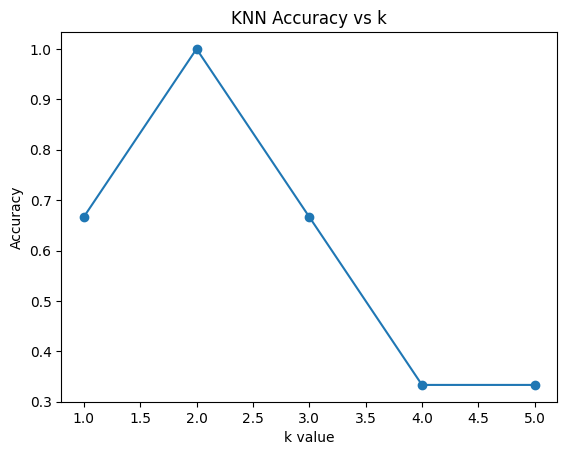

In [17]:
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])
cm


array([[0, 1],
       [1, 1]])

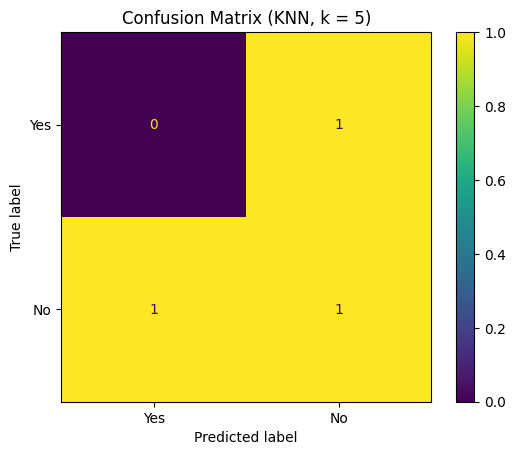

In [23]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Yes', 'No']
)

disp.plot()
plt.title(f"Confusion Matrix (KNN, k = {k})")
plt.show()